In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
speed = pd.read_csv('../winds/Debilt_speed.dat')
speed = speed.drop(columns='Unnamed: 0')
data = speed[speed['month']==3][['val_x', 'val_y']]

In [2]:
speed

,val,day,month,year,val_x,val_y
0,-2.495516,1,1,1904,-2.48,-1.87
1,2.880158,2,1,1904,-2.99,0.80
2,2.600271,3,1,1904,-4.89,2.94
3,2.303731,4,1,1904,-4.15,4.61
4,-2.706148,5,1,1904,-4.17,-1.94
...,...,...,...,...,...,...
42683,2.424645,10,12,2020,-2.26,1.97
42684,2.408455,11,12,2020,-3.42,3.08
42685,1.746627,12,12,2020,-0.35,1.97
42686,1.676905,13,12,2020,-0.36,3.38


In [21]:
def draw_pcas(datas):
    k = 1

    plt.figure(figsize=(16, 7))
    for data in datas:

        pca = PCA(n_components=1)
        pca.fit(data)
        #plt.scatter(data['val_x'], data['val_y'], color='red')
        x = np.linspace(-10, 10, 100)
        plt.plot(x, list(map(lambda t : t * pca.components_[0][1]/pca.components_[0][0], x)), label=str(k))
        k += 1
    plt.grid(True)
    plt.legend(fontsize=14)
    
def draw_pca(data):
    pca = PCA(n_components=1)
    pca.fit(data)
    plt.figure(figsize=(16, 7))
    plt.scatter(data['val_x'], data['val_y'], color='red')
    x = np.linspace(-10, 10, 100)
    plt.plot(x, list(map(lambda t : t * pca.components_[0][1]/pca.components_[0][0], x)))
    plt.title('y=' + str(pca.components_[0][1]) + ' x=' + str(pca.components_[0][0]))
    print('y=' + str(pca.components_[0][1]) + ' x=' + str(pca.components_[0][0]))

    

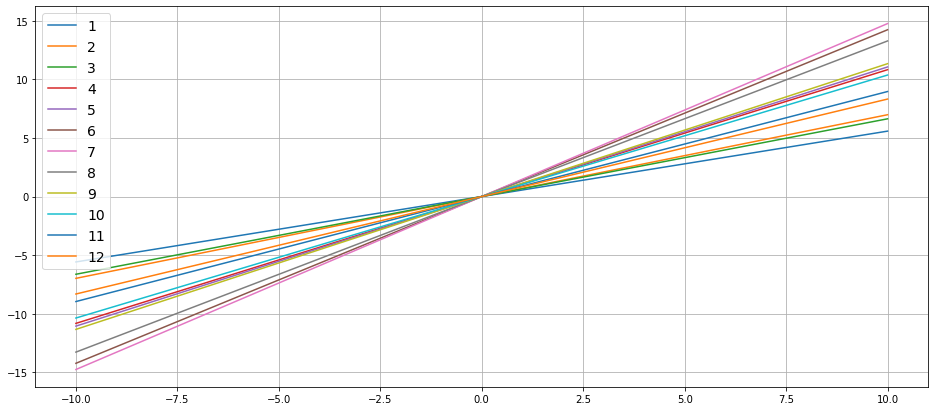

In [22]:
datas = []
for k in range(1, 13):
    datas.append(speed[speed['month']==k][['val_x', 'val_y']])
draw_pcas(datas)

In [23]:
speed

,val,day,month,year,val_x,val_y
0,-2.495516,1,1,1904,-2.48,-1.87
1,2.880158,2,1,1904,-2.99,0.80
2,2.600271,3,1,1904,-4.89,2.94
3,2.303731,4,1,1904,-4.15,4.61
4,-2.706148,5,1,1904,-4.17,-1.94
...,...,...,...,...,...,...
42683,2.424645,10,12,2020,-2.26,1.97
42684,2.408455,11,12,2020,-3.42,3.08
42685,1.746627,12,12,2020,-0.35,1.97
42686,1.676905,13,12,2020,-0.36,3.38


y=-0.6398439351566007 x=-0.768504872231345


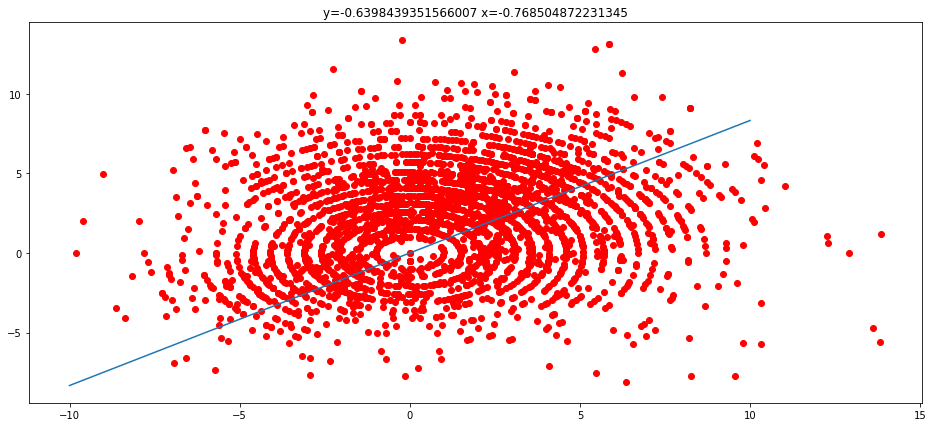

In [24]:
draw_pca(speed[speed['month']==12][['val_x', 'val_y']])

y=0.48770250559122136 x=0.8730098888558162


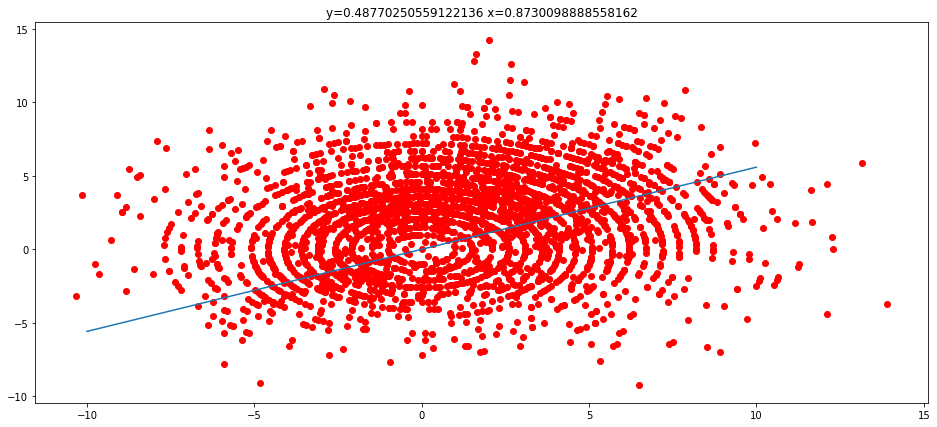

In [25]:
draw_pca(speed[speed['month']==1][['val_x', 'val_y']])

y=0.5727860856364856 x=0.8197048859810661


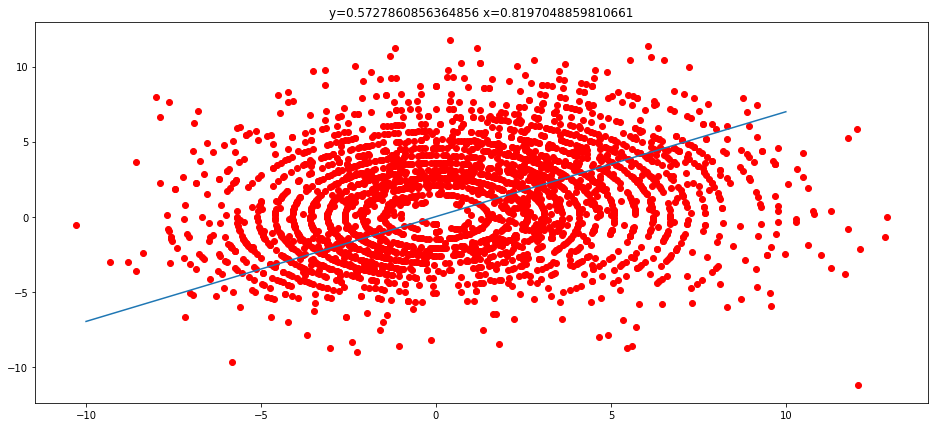

In [26]:
draw_pca(speed[speed['month']==2][['val_x', 'val_y']])

y=-0.5530703488915586 x=-0.8331345564655026


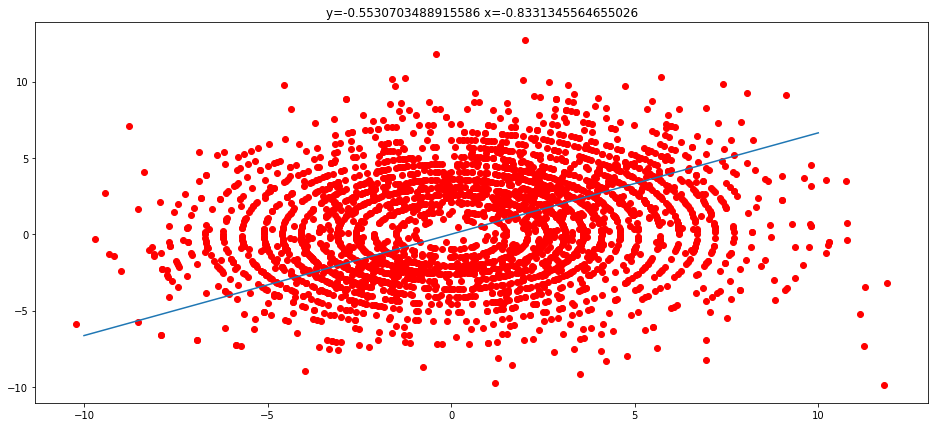

In [27]:
draw_pca(speed[speed['month']==3][['val_x', 'val_y']])

y=0.7348609161006322 x=0.6782178366776707


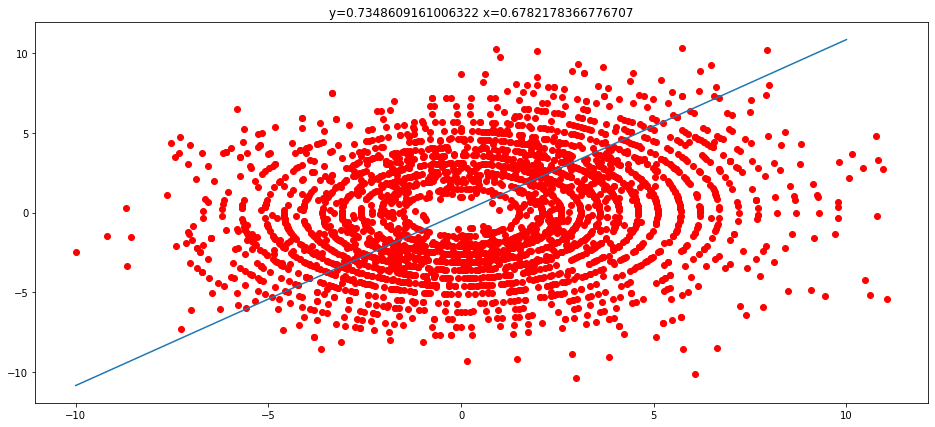

In [28]:
draw_pca(speed[speed['month']==4][['val_x', 'val_y']])

y=0.7420279616977459 x=0.6703689313047619


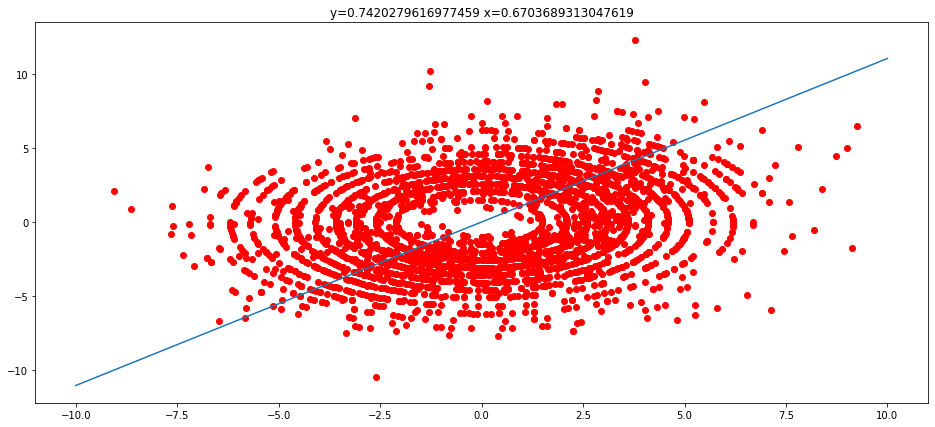

In [29]:
draw_pca(speed[speed['month']==5][['val_x', 'val_y']])

y=-0.8281308294943625 x=-0.5605348599694573


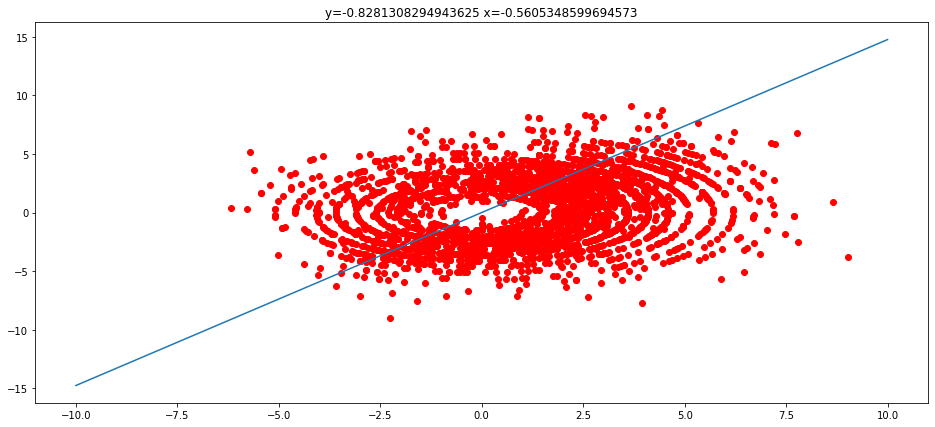

In [30]:
draw_pca(speed[speed['month']==7][['val_x', 'val_y']])

1-й и 7-й месяцы различаются сильнее всего.

Координаты векторов для них:

$y_1=0.48770250559122136$ $x_1=0.8730098888558162$

$y_2=0.8281308294943625$ $x_2=0.5605348599694573$

min 0.0015930634597541848
max 12.409697037356981
mean 3.312300761545139


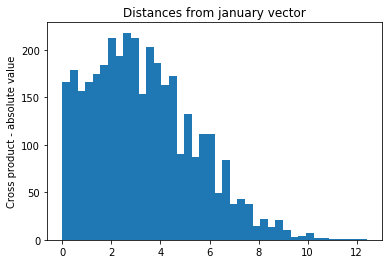

In [49]:
import math

def dist(pt, base_vec):
    return abs(pt[0] * base_vec[1] + pt[1] * base_vec[0])

vec_january = (0.48770250559122136, 0.8730098888558162)
vec_july = (0.5605348599694573, 0.8281308294943625)

distances = data.apply(lambda row: dist((row['val_x'], row['val_y']), vec_january), axis=1)
distances = np.array(distances)
print('min', distances.min())
print('max', distances.max())
print('mean', distances.mean())
plt.title('Distances from january vector')
plt.ylabel('Cross product - absolute value')
plt.hist(distances, bins=40)
plt.show()

min 0.0023328124939359096
max 12.664631087910035
mean 3.3202822041516202


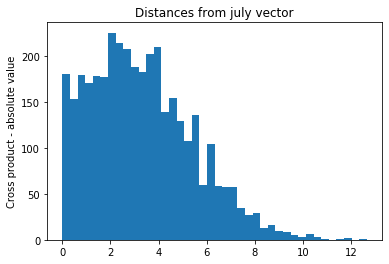

In [50]:
distances = data.apply(lambda row: dist((row['val_x'], row['val_y']), vec_july), axis=1)
distances = np.array(distances)
print('min', distances.min())
print('max', distances.max())
print('mean', distances.mean())
plt.title('Distances from july vector')
plt.ylabel('Cross product - absolute value')
plt.hist(distances, bins=40)
plt.show()